# Imports

In [ ]:
!pip install itables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load in df
df = pd.read_csv('/content/drive/MyDrive/Data Science Project 3 - CR/Final_Data.csv')

<ipython-input-3-2e53f2b04ff8>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data Science Project 3 - CR/Final_Data.csv')


In [ ]:
# Fix negatives and errors
df.loc[(df['savings_amount'] == 0) | (df['years_old'] == 0), 'yearly_depreciation'] = 0
df.loc[(df['savings_amount'] != 0) & (df['years_old'] != 0), 'yearly_depreciation'] = df['savings_amount'] / df['years_old']

In [ ]:
# Fix negatives and errors
df.loc[(df['savings_amount'] == 0) | (df['mileage'] == 0), 'depreciation_per_mile'] = 0
df.loc[(df['savings_amount'] != 0) & (df['mileage'] != 0), 'depreciation_per_mile'] = df['savings_amount'] / df['mileage']

In [ ]:
# Set price range
df = df[df['price'] < 150001]

In [ ]:
# Shift date
df['years_old'] = df['years_old'] + 1

# Data Analysis

### Relationship Between Price and Days on Market

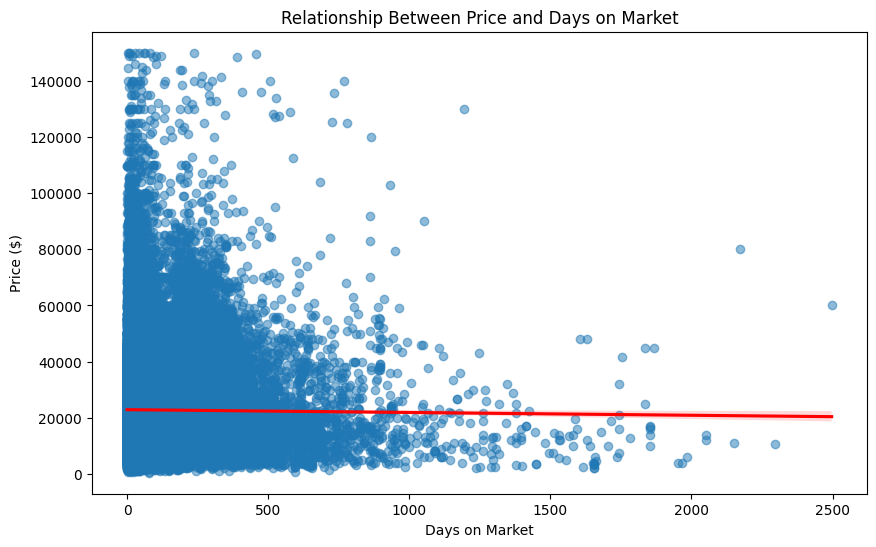

In [ ]:
# Relationship Between Price and Days on Market

# Set figure size
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x=df['daysonmarket'], y=df['price'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Titles and labels
plt.title('Relationship Between Price and Days on Market')
plt.xlabel('Days on Market')
plt.ylabel('Price ($)')

# Show the plot
plt.show()

In [ ]:
# Check correlation between price and daysonmarket
df[['price', 'daysonmarket']].corr()

price  daysonmarket
price         1.000000     -0.007364
daysonmarket -0.007364      1.000000

This is showing that how many days a car has been on the market does not affect its price.

What kind of cars tend to be on the market for longer, and what kind of cars tend to be on the market for shorter?

### Days on Market

<ipython-input-41-f3e8d857c446>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zero_days_make_counts.index,


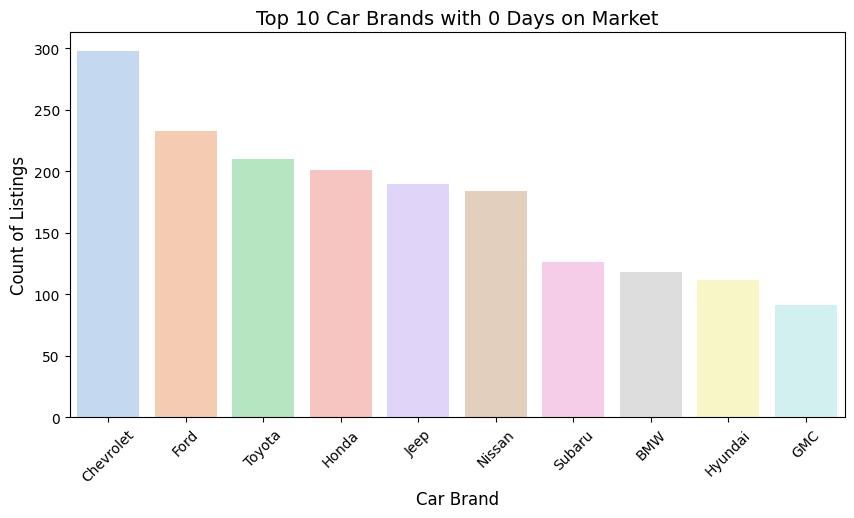

In [ ]:
# Top 10 Cars with 0 Days on Market

# Filter cars with 0 days on market
zero_days_on_market = df[df['daysonmarket'] == 0]

# Count top brands that sell instantly
zero_days_make_counts = zero_days_on_market['make_name'].value_counts().head(10)

# Set up figure with transparent background
plt.figure(figsize=(10, 5), facecolor='none')  # Set entire figure transparent

# Create bar chart with transparent bars
sns.barplot(x=zero_days_make_counts.index,
            y=zero_days_make_counts.values,
            palette="pastel",
            alpha=0.7)

# Titles and labels
plt.title('Top 10 Car Brands with 0 Days on Market', fontsize=14, color='black')
plt.xlabel('Car Brand', fontsize=12, color='black')
plt.ylabel('Count of Listings', fontsize=12, color='black')
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')

# Set transparent background
plt.gca().patch.set_alpha(0)  # Makes the plot area transparent
plt.show()

# Summary statistics of cars that sell instantly
summary_stats = zero_days_on_market[['price', 'mileage', 'year', 'fuel_type', 'body_type']].describe()

In [ ]:
# Compare Fast-Selling vs. Slow-Selling Cars

# Define fast-selling and slow-selling groups based on quartiles
low_market_time = df[df['daysonmarket'] <= df['daysonmarket'].quantile(0.25)]  # Fastest 25%
high_market_time = df[df['daysonmarket'] >= df['daysonmarket'].quantile(0.75)]  # Slowest 25%

# Compare key attributes
summary_low = low_market_time[['price', 'mileage', 'year', 'fuel_type', 'body_type']].describe()
summary_high = high_market_time[['price', 'mileage', 'year', 'fuel_type', 'body_type']].describe()

# Display summary statistics
print("**Summary of Fast-Selling Cars:**")
display(summary_low)
print("\n **Summary of Slow-Selling Cars:**")
display(summary_high)

**Summary of Fast-Selling Cars:**


price        mileage          year
count   53477.000000   53477.000000  53477.000000
mean    23279.989547   50774.000187   2015.925033
std     12248.834300   40085.687696      3.293928
min       777.000000       0.000000   1988.000000
25%     14995.000000   23318.000000   2015.000000
50%     20990.000000   37460.000000   2017.000000
75%     29900.000000   70000.000000   2018.000000
max    150000.000000  332105.000000   2021.000000


 **Summary of Slow-Selling Cars:**


price        mileage          year
count   52676.000000   52676.000000  52676.000000
mean    22402.962677   51347.816710   2015.895550
std     13916.565020   44472.552528      3.798647
min       400.000000       0.000000   1986.000000
25%     13695.000000   20111.000000   2015.000000
50%     18995.000000   37018.000000   2017.000000
75%     27914.500000   75693.000000   2018.000000
max    149999.000000  341690.000000   2021.000000

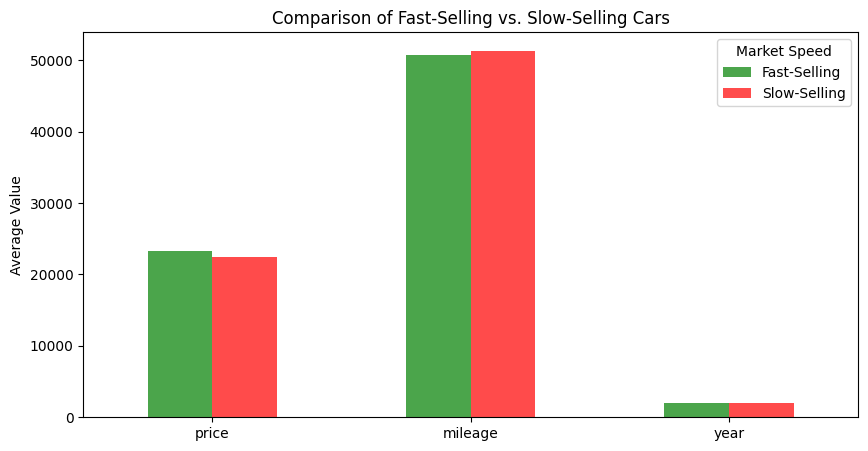

In [ ]:
# Comparision of Fast-Selling vs. Slow-Selling Cars

# Compute mean values for fast vs. slow-selling cars
avg_fast = low_market_time[['price', 'mileage', 'year']].mean()
avg_slow = high_market_time[['price', 'mileage', 'year']].mean()

# Create a dataframe for plotting
compare_df = pd.DataFrame({'Fast-Selling': avg_fast, 'Slow-Selling': avg_slow})

# Transparent bar plot
fig, ax = plt.subplots(figsize=(10, 5), facecolor='none')
compare_df.plot(kind='bar', ax=ax, color=['green', 'red'], alpha=0.7)  # Semi-transparent bars

# Customize labels and transparency
plt.title("Comparison of Fast-Selling vs. Slow-Selling Cars", color='black')
plt.ylabel("Average Value", color='black')
plt.xticks(rotation=0, color='black')
plt.yticks(color='black')
plt.legend(title="Market Speed")

# Set transparent background for the plot area
ax.patch.set_alpha(0)  # Make the plot background transparent
plt.show()


PRICES:
- Prices of fast-selling cars are slightly higher on average but not by much.
- There are some very expensive outliers in fast-selling cars, over $2.6M, possibly exotic or collector cars.

- Median price suggests the majority of fast-selling cars are under $20,000, meaning affordable cars may move quicker.

MILEAGE:
- Not much difference in mileage between fast and slow sellers.
- High-mileage cars can still sell quickly if they have the right price and demand.

YEAR:
- The average year is the same, but there are older slow-selling cars (1986 models vs. 1988 for fast sellers).
- Newer cars (2017+) tend to sell faster, while older models (pre-2010) may take longer.


In [ ]:
# Investigate Outliers (Extremely Fast-Selling or Slow-Selling Cars)

# Find extremely fast-selling cars (1 day or less)
extremely_fast = df[df['daysonmarket'] <= 1]

# Find extremely slow-selling cars (e.g., over 1 year)
extremely_slow = df[df['daysonmarket'] >= 365]

# Display results
print(" **Extremely Fast-Selling Cars (≤1 Day on Market):**")
display(extremely_fast.head(10))

print("\n **Extremely Slow-Selling Cars (≥365 Days on Market):**")
display(extremely_slow.head(10))

 **Extremely Fast-Selling Cars (≤1 Day on Market):**


vin        body_type  daysonmarket dealer_zip  \
177  5XYZKDAG5CG153685  SUV / Crossover             1      11706   
269  1GNERGKW4JJ139041  SUV / Crossover             1      11706   
277  2GKFLSEK7H6340471  SUV / Crossover             1      11706   
337  1G1FD1RS3H0122137            Coupe             1      11706   
394  JH4CU2F47DC001706            Sedan             1       7643   
435  1FAHP3M21CL363282        Hatchback             1       7643   
451  1FMCU9EG3CKA80474  SUV / Crossover             0       7643   
475  3GNAXMEV5JS510695  SUV / Crossover             1      11706   
497  2G1115SL5F9217329            Sedan             1       7643   
523  1FADP3F23FL344295            Sedan             0       7643   

     engine_displacement           engine_type  fleet  frame_damaged  \
177               3500.0                    V6  False          False   
269               3600.0                    V6  False          False   
277               2400.0                    I4  False          False   
337               3600.0                    V6  False          False   
394               2400.0                    I4  False          False   
435               2000.0                    I4   True          False   
451               3000.0  V6 Flex Fuel Vehicle   True          False   
475               1500.0                    I4  False          False   
497               2500.0                    I4  False          False   
523               2000.0  I4 Flex Fuel Vehicle  False          False   

     franchise_dealer  front_legroom  ...  transmission wheel_system_display  \
177              True           42.6  ...             A      All-Wheel Drive   
269              True           41.0  ...             A    Front-Wheel Drive   
277              True           41.2  ...             A      All-Wheel Drive   
337              True           43.9  ...             A     Rear-Wheel Drive   
394             False           42.4  ...             A    Front-Wheel Drive   
435             False           41.9  ...             A    Front-Wheel Drive   
451             False           41.6  ...             A      All-Wheel Drive   
475              True           40.9  ...             A    Front-Wheel Drive   
497             False           45.8  ...             A    Front-Wheel Drive   
523             False           43.7  ...             A    Front-Wheel Drive   

     wheelbase  width  year years_old  option_count  original_price  \
177      106.3   74.4  2012         9           5.0         11902.0   
269      120.9   78.6  2018         3           6.0         26603.0   
277      112.5   72.8  2017         4           4.0         17380.0   
337      110.7   74.7  2017         4          14.0         27006.0   
394      106.4   72.4  2013         8           2.0         13416.0   
435      104.3   80.1  2012         9           1.0          5835.0   
451      103.1   81.3  2012         9           2.0          6902.0   
475      107.3   72.6  2018         3          12.0         23637.0   
497      111.7   84.2  2015         6           3.0         11981.0   
523      104.3   71.8  2015         6           1.0          7575.0   

    yearly_depreciation depreciation_per_mile  
177          116.250000              0.014813  
269           17.000000              0.000954  
277          136.000000              0.008589  
337           11.333333              0.002088  
394          295.142857              0.026526  
435          167.000000              0.009361  
451          175.375000              0.009094  
475          132.500000              0.016281  
497          296.400000              0.013982  
523          315.200000              0.013800  

[10 rows x 39 columns]


 **Extremely Slow-Selling Cars (≥365 Days on Market):**


vin        body_type  daysonmarket dealer_zip  \
1    SALZL2GX4LH007593  SUV / Crossover           510        922   
129  1J4GA591X9L742075  SUV / Crossover           589       7036   
152  WBAYF4C5XFD874029            Sedan           384      11797   
228  1GNSKCKC0GR256521  SUV / Crossover           400      11706   
573  5NPE24AF9HH438010            Sedan           450       7643   
697  5TDZK3DC3GS744562          Minivan           405      11716   
837  5UXKR0C55H0U52297  SUV / Crossover           509      11021   
846  WDDWF4KB7HR257135            Sedan           410      11021   
906  4JGDA5HB0HA883942  SUV / Crossover           410      11021   
929  WDC0G4KB2HF138160  SUV / Crossover           406      11021   

     engine_displacement           engine_type  fleet  frame_damaged  \
1                 2000.0                    I4  False          False   
129               3800.0                    V6  False          False   
152               3000.0                    I6  False          False   
228               5300.0  V8 Flex Fuel Vehicle  False          False   
573               2400.0                    I4  False          False   
697               3500.0                    V6  False          False   
837               3000.0                    I6  False          False   
846               2000.0                    I4  False          False   
906               3500.0                    V6  False          False   
929               2000.0                    I4  False          False   

     franchise_dealer  front_legroom  ...  transmission wheel_system_display  \
1                True           40.0  ...             A      All-Wheel Drive   
129             False           41.0  ...             M     Four-Wheel Drive   
152             False           41.3  ...             A      All-Wheel Drive   
228              True           45.3  ...             A     Four-Wheel Drive   
573             False           45.5  ...             A    Front-Wheel Drive   
697              True           40.5  ...             A    Front-Wheel Drive   
837             False           40.4  ...             A      All-Wheel Drive   
846             False           41.7  ...             A      All-Wheel Drive   
906             False           40.3  ...             A      All-Wheel Drive   
929             False           40.8  ...             A      All-Wheel Drive   

     wheelbase  width  year years_old  option_count  original_price  \
1        105.6   82.7  2020         1           8.0         84399.0   
129      116.0   82.8  2009        12           1.0         16295.0   
152      126.4   84.0  2015         6          14.0         26464.0   
228      116.0   80.5  2016         5          22.0         41384.0   
573      110.4   73.4  2017         4           3.0         10945.0   
697      119.3   78.1  2016         5           4.0         23091.0   
837      115.5   86.0  2017         4          19.0         36943.0   
846      111.8   79.5  2017         4          17.0         24463.0   
906      114.8   84.3  2017         4          14.0         32404.0   
929      113.1   82.5  2017         4           3.0         26195.0   

    yearly_depreciation depreciation_per_mile  
1              0.000000              0.000000  
129          345.090909              0.037284  
152          593.800000              0.048086  
228          861.250000              0.060059  
573          565.000000              0.016425  
697          360.750000              0.047969  
837         1149.333333              0.077066  
846         1956.000000              0.128175  
906          936.333333              0.058648  
929            0.000000              0.000000  

[10 rows x 39 columns]

### Top 20 Car Makes

In [ ]:
# Count unique make_name
df['make_name'].nunique()

53

Decided to filter top 20 `make_name` - makes up 90% of the data

In [ ]:
make_to_group = {
    'Mercedes-Benz': 'High End',
    'BMW': 'High End',
    'RAM': 'High End',
    'Audi': 'High End',
    'Cadillac': 'High End',

    'Lexus': 'Upper-Mid',
    'GMC': 'Upper-Mid',
    'Ford': 'Upper-Mid',
    'Jeep': 'Upper-Mid',
    'Dodge': 'Upper-Mid',

    'Chevrolet': 'Mid',
    'Toyota': 'Mid',
    'Subaru': 'Mid',
    'Buick': 'Mid',
    'Mazda': 'Mid',

    'Honda': 'Affordable',
    'Nissan': 'Affordable',
    'Volkswagon': 'Affordable',
    'Kia': 'Affordable',
    'Hyundai': 'Affordable'
}

df['price_group'] = df['make_name'].map(make_to_group)

In [ ]:
# Get top 20 most common car makes
top_20_makes = df["make_name"].value_counts().head(20).index

# Filter df to only include those top 20 `make_name`s
top_20_df = df[df["make_name"].isin(top_20_makes)]

# Display the result
top_20_df.head()

vin        body_type  daysonmarket dealer_zip  \
2  KMHD84LFXHU271438            Sedan            33      11706   
3  1G1ZD5ST5JF222895            Sedan            55      11706   
4  JTHSZ5BC5J5008777            Coupe            36      10466   
5  1GNERFKW0JJ104068  SUV / Crossover            27      11706   
6  1GNKVGKD7HJ340326  SUV / Crossover            27      11706   

   engine_displacement engine_type  fleet  frame_damaged  franchise_dealer  \
2               1600.0          I4  False          False              True   
3               1500.0          I4   True          False              True   
4               3500.0          V6  False          False              True   
5               3600.0          V6  False          False              True   
6               3600.0          V6  False          False              True   

   front_legroom  ...  wheel_system_display wheelbase  width  year  years_old  \
2           42.2  ...     Front-Wheel Drive     106.3   70.9  2017          4   
3           42.0  ...     Front-Wheel Drive     111.4   73.0  2018          3   
4           45.4  ...       All-Wheel Drive     107.5   81.5  2018          3   
5           41.0  ...     Front-Wheel Drive     120.9   78.6  2018          3   
6           41.3  ...       All-Wheel Drive     118.9   78.5  2017          4   

  option_count  original_price  yearly_depreciation depreciation_per_mile  \
2         12.0         16033.0           903.000000              0.088221   
3         14.0         16388.0           874.500000              0.041256   
4          7.0         33861.0           930.500000              0.029895   
5         15.0         27223.0          1750.000000              0.096127   
6         17.0         24838.0           805.333333              0.067009   

  price_group  
2  Affordable  
3         Mid  
4   Upper-Mid  
5         Mid  
6         Mid  

[5 rows x 40 columns]

In [ ]:
# Summary Table
summary = top_20_df.groupby("make_name")[["price", "daysonmarket"]].mean().sort_values("price", ascending=False)
print(summary)

                      price  daysonmarket
make_name                                
Mercedes-Benz  35035.867828     63.016843
BMW            32736.028410     71.521247
RAM            31950.446665     45.598930
Audi           30258.003477     52.397870
Cadillac       28069.685496     62.267176
Lexus          27615.497866     46.834756
GMC            27259.509930     53.356578
Ford           24361.061790     66.010339
Jeep           23530.753717     49.245694
Dodge          22184.317729     61.339530
Chevrolet      22120.046421     53.858674
Toyota         20777.917345     44.342713
Subaru         18762.449573     52.174753
Buick          18746.407451     54.501774
Mazda          18113.902717     45.369987
Honda          17755.338977     44.600604
Nissan         17120.934206     53.542596
Volkswagen     16582.130338     51.540104
Kia            15781.378708     56.042007
Hyundai        15414.525274     56.048074


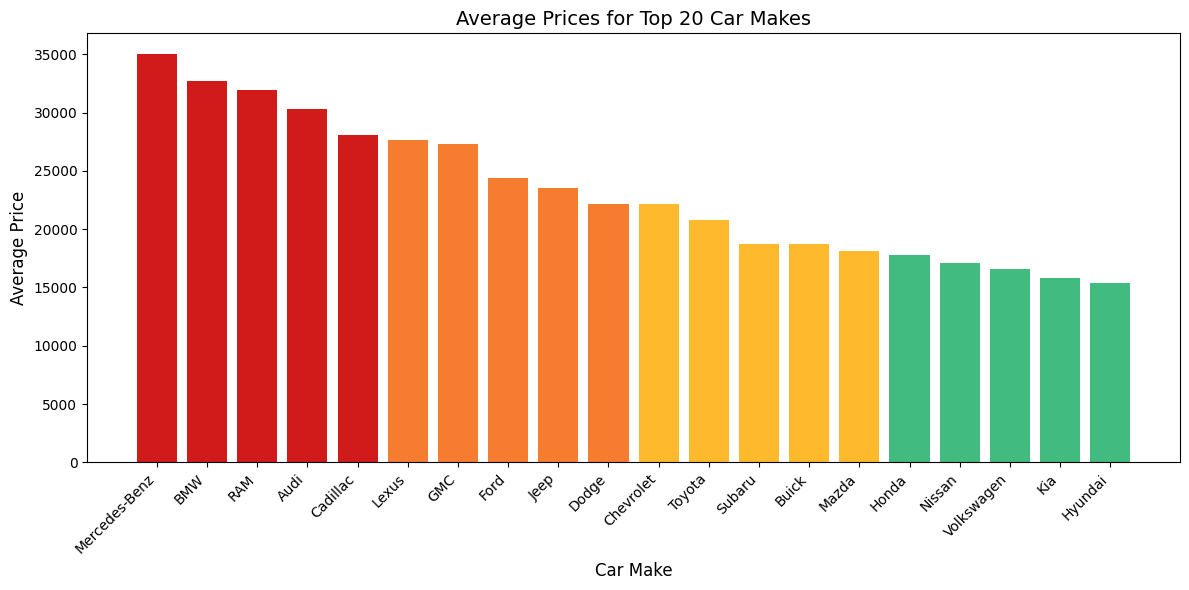

In [ ]:
# Average price for each of the top 20 car makes

avg_prices = top_20_df.groupby('make_name')['price'].mean().sort_values(ascending=False)

# Define color groups
colors = ['#d11a1a'] * 5 + ['#f67c30'] * 5 + ['#feb92d'] * 5 + ['#41bb7f'] * 5

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(avg_prices.index, avg_prices.values, color=colors)
plt.xlabel('Car Make', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Prices for Top 20 Car Makes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Make background transparent
plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.tight_layout()
plt.show()


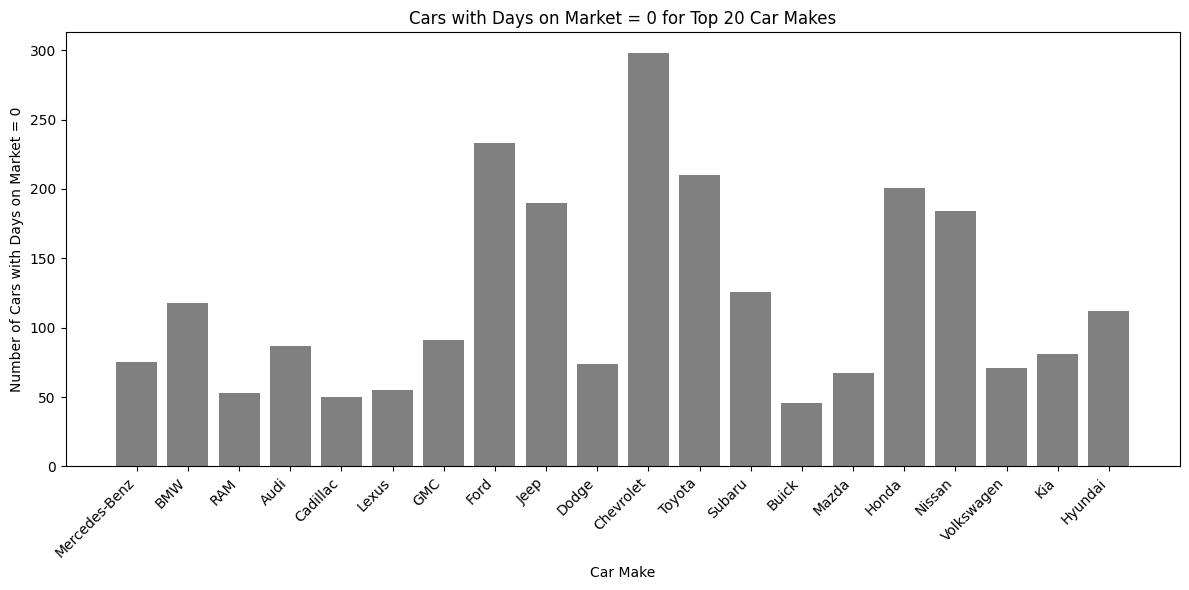

In [ ]:
# Cars with Days on Market = 0 for Top 20 Car Makes

# Filter dataset for cars with daysonmarket == 0
zero_dom_df = top_20_df[top_20_df['daysonmarket'] == 0]

# Count how many cars with daysonmarket == 0 for each of the top 20 makes (keep original order)
zero_dom_counts = zero_dom_df['make_name'].value_counts().reindex(avg_prices.index).fillna(0)

# Plot using gray bars
plt.figure(figsize=(12, 6))
plt.bar(zero_dom_counts.index, zero_dom_counts.values, color='gray')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars with Days on Market = 0')
plt.title('Cars with Days on Market = 0 for Top 20 Car Makes')
plt.xticks(rotation=45, ha='right')

# Transparent background
plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.tight_layout()
plt.show()


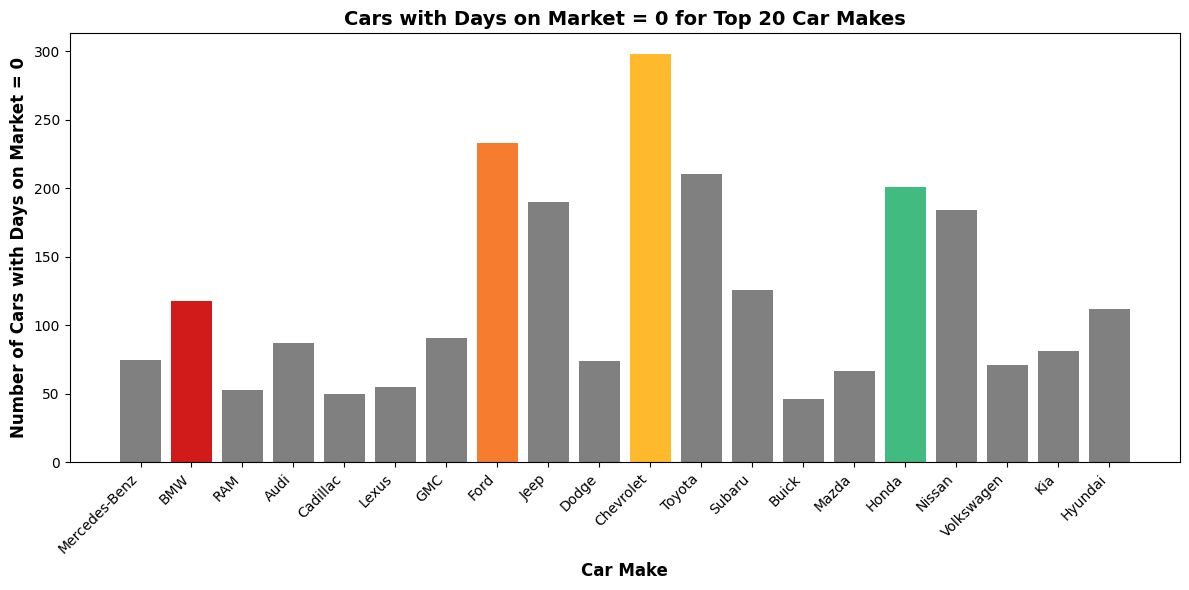

In [ ]:
# Cars with Days on Market = 0 for Top 20 Car Makes (Selected Colors)

# Filter dataset for cars with daysonmarket == 0
zero_dom_df = top_20_df[top_20_df['daysonmarket'] == 0]

# Count how many cars with daysonmarket == 0 for each of the top 20 makes (keep original order)
zero_dom_counts = zero_dom_df['make_name'].value_counts().reindex(avg_prices.index).fillna(0)

# Define bar colors: orange for Ford, gray for all others
bar_colors = ['#d11a1a' if make == 'BMW' else'#41bb7f' if make == 'Honda' else '#feb92d' if make == 'Chevrolet' else '#f67c30' if make == 'Ford' else 'gray' for make in zero_dom_counts.index]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(zero_dom_counts.index, zero_dom_counts.values, color=bar_colors)
plt.xlabel('Car Make', fontsize=12, fontweight='bold')
plt.ylabel('Number of Cars with Days on Market = 0', fontsize=12, fontweight='bold')
plt.title('Cars with Days on Market = 0 for Top 20 Car Makes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Transparent background
plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.tight_layout()
plt.show()


### Body Type

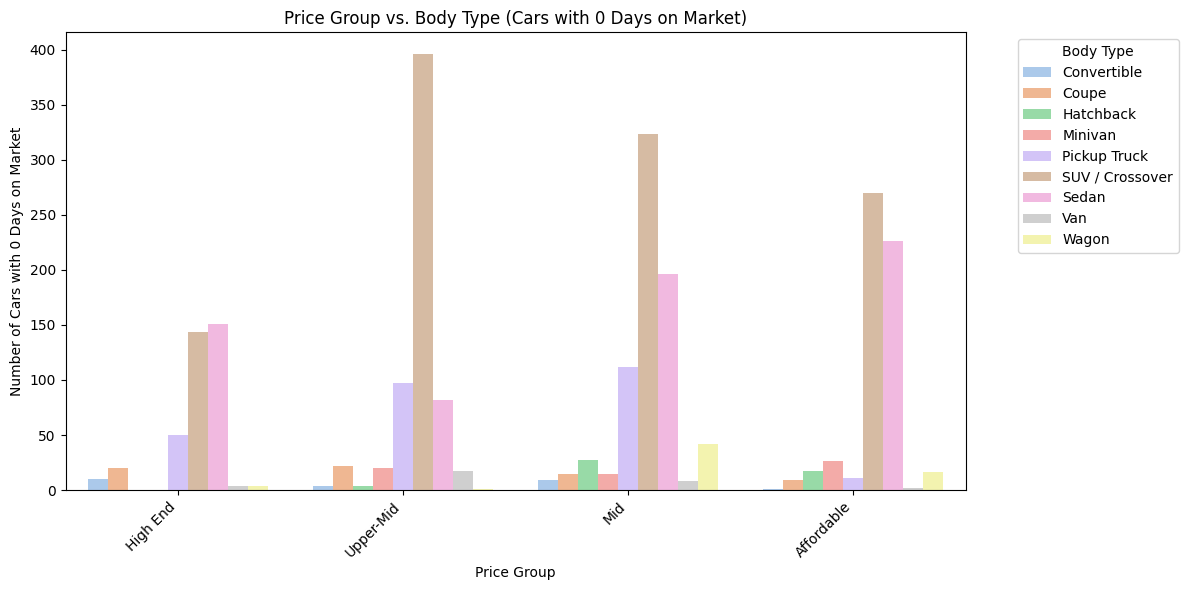

In [ ]:
# Price Group vs. Body Type (Cars with 0 Days on Market)

# Filter data for cars with daysonmarket == 0
zero_days_df = df[df['daysonmarket'] == 0]

# Group data by price group and body type, then count occurrences
price_group_body_counts = zero_days_df.groupby(['price_group', 'body_type'])['body_type'].count().reset_index(name='count')

# Create the grouped bar chart with specified order
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='price_group', y='count', hue='body_type', data=price_group_body_counts,
            order=['High End', 'Upper-Mid', 'Mid', 'Affordable'], palette="pastel")

plt.title('Price Group vs. Body Type (Cars with 0 Days on Market)')
plt.xlabel('Price Group')
plt.ylabel('Number of Cars with 0 Days on Market')  # Update y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Body Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside plot
plt.tight_layout()

# Transparent background
plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.show()

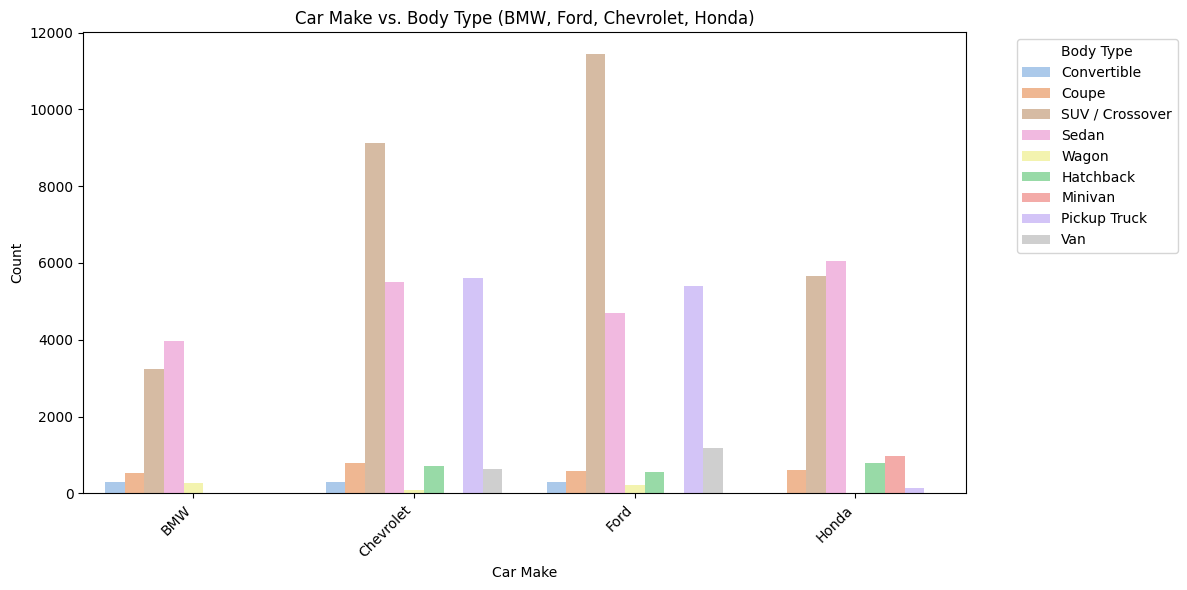

In [ ]:
# Car Make vs. Body Type (BMW, Ford, Chevrolet, Honda)

# Filter data for car makes
selected_makes = ['BMW', 'Ford', 'Chevrolet', 'Honda']
filtered_df = df[df['make_name'].isin(selected_makes)]

# Group data by car make & body type - then count
make_body_counts = filtered_df.groupby(['make_name', 'body_type'])['body_type'].count().reset_index(name='count')

# Color mapping
body_type_colors = {
    'Convertible': sns.color_palette("pastel")[0],  # Blue
    'Coupe': sns.color_palette("pastel")[1],  # Orange
    'Hatchback': sns.color_palette("pastel")[2],  # Green
    'Minivan': sns.color_palette("pastel")[3],  # Red
    'Pickup Truck': sns.color_palette("pastel")[4],  # Purple
    'SUV / Crossover': sns.color_palette("pastel")[5],  # Brown
    'Sedan': sns.color_palette("pastel")[6],  # Pink
    'Van': sns.color_palette("pastel")[7],  # Gray
    'Wagon': sns.color_palette("pastel")[8]  # Yellow
}

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='make_name', y='count', hue='body_type', data=make_body_counts,
            palette=body_type_colors)  # Use the defined color mapping

plt.title('Car Make vs. Body Type (BMW, Ford, Chevrolet, Honda)')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Body Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Transparent background
plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

plt.show()

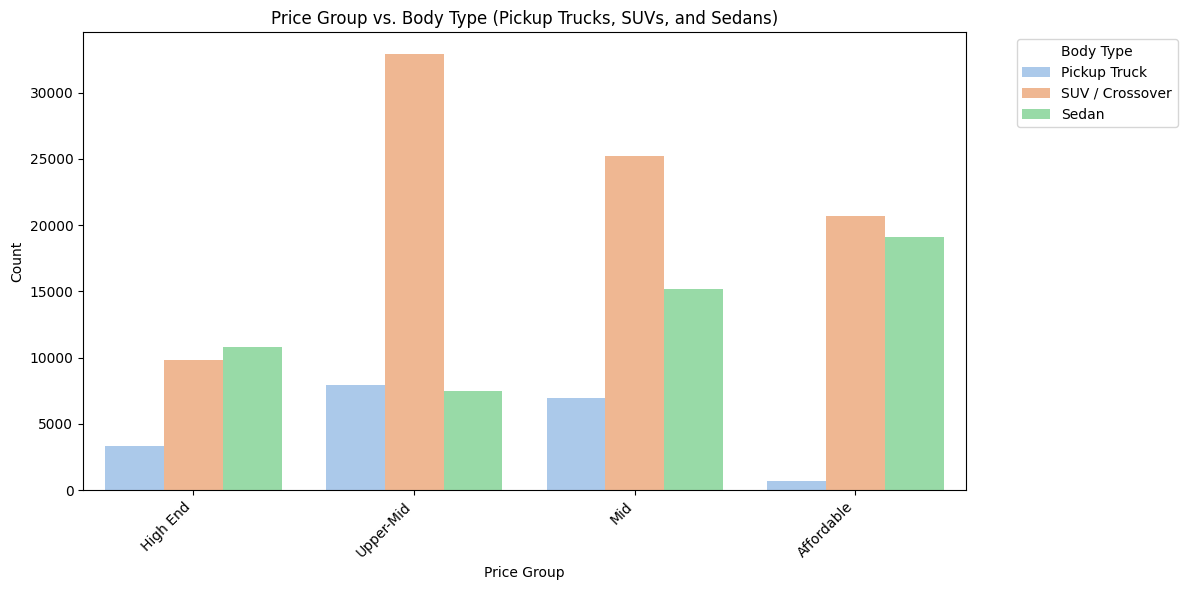

In [ ]:
# Price Group vs. Body Type (Pickup Trucks, SUVs, and Sedans)

# Filter data
filtered_df = df[df['body_type'].isin(['Pickup Truck', 'SUV / Crossover', 'Sedan'])]

# Group data
price_group_body_counts = filtered_df.groupby(['price_group', 'body_type'])['body_type'].count().reset_index(name='count')

# Bar chart with specified order
plt.figure(figsize=(12, 6))
sns.barplot(x='price_group', y='count', hue='body_type', data=price_group_body_counts,
            order=['High End', 'Upper-Mid', 'Mid', 'Affordable'], palette="pastel")

plt.title('Price Group vs. Body Type (Pickup Trucks, SUVs, and Sedans)')
plt.xlabel('Price Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Body Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


## Average Days on Market

After creating the first model, this code is to show the analysis that we did after the model to draw conclusions.

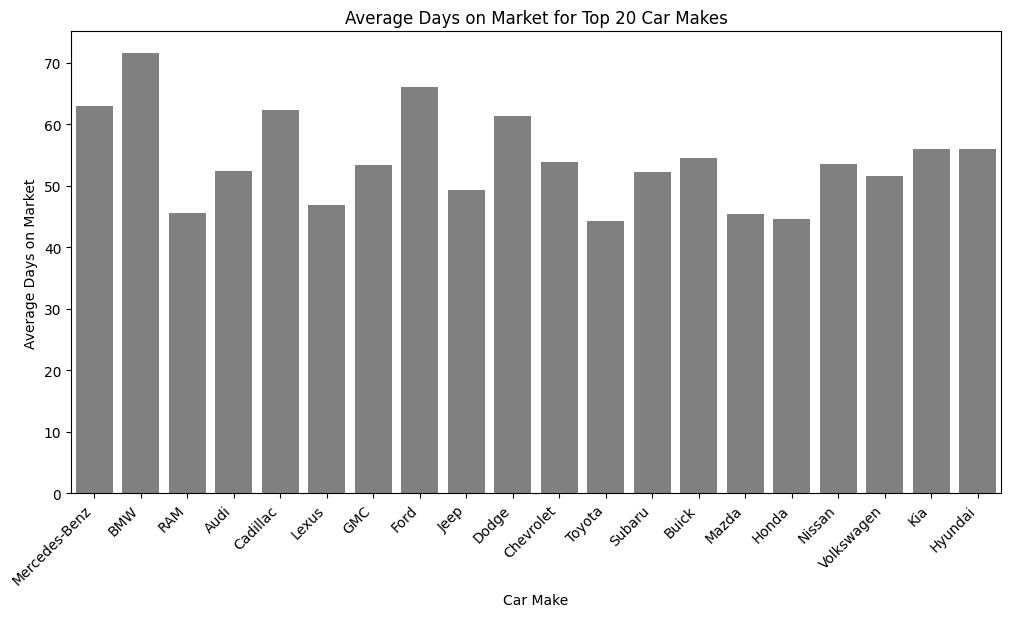

In [ ]:
# Average Days on Market for Top 20 Car Makes

# Calculate average days on market for each make
avg_daysonmarket = top_20_df.groupby('make_name')['daysonmarket'].mean().reindex(avg_prices.index)

# Create bar chart with gray bars
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_daysonmarket.index, y=avg_daysonmarket.values, color='gray')  # Set color to 'gray'

# Customize plot (same as before)
plt.title('Average Days on Market for Top 20 Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=45, ha='right')

# Transparent background
plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

# Show plot
plt.show()

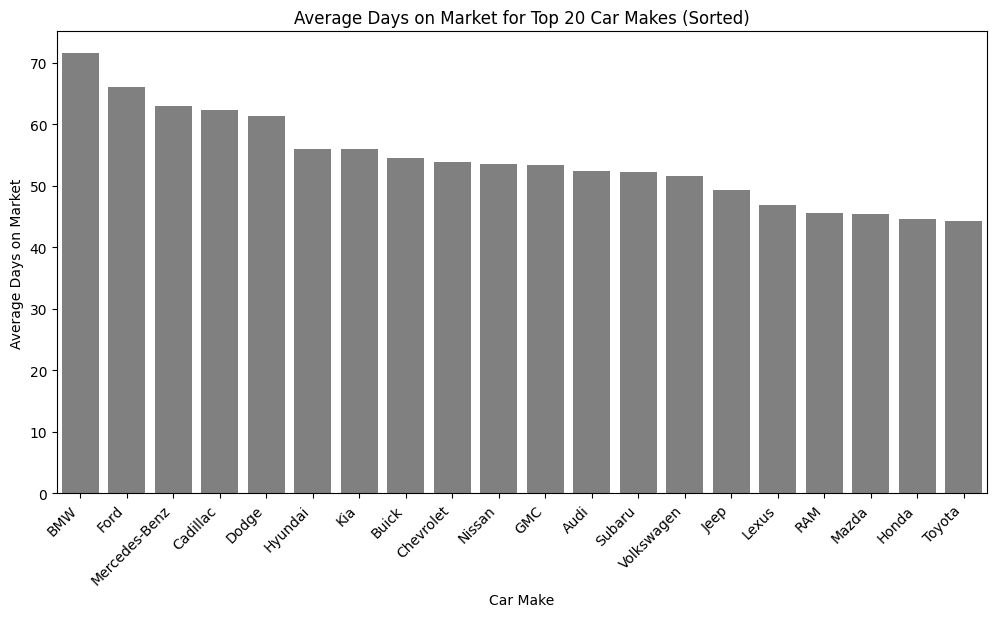

In [ ]:
# Calculate average days on market and sort in descending order
avg_daysonmarket = top_20_df.groupby('make_name')['daysonmarket'].mean().sort_values(ascending=False)

# Create bar chart with gray bars and sorted order
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_daysonmarket.index, y=avg_daysonmarket.values, color='gray', order=avg_daysonmarket.index)

# Customize plot (same as before)
plt.title('Average Days on Market for Top 20 Car Makes (Sorted)')
plt.xlabel('Car Make')
plt.ylabel('Average Days on Market')
plt.xticks(rotation=45, ha='right')

# Transparent background
plt.gca().patch.set_alpha(0)
plt.gcf().patch.set_alpha(0)

# Show plot
plt.show()